   movieId                                        title_clean  rating
0        2                                     Jumanji (1995)     3.5
1       29  City of Lost Children, The (Cité des enfants p...     3.5
2       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)     3.5
3       47                        Seven (a.k.a. Se7en) (1995)     3.5
4       50                          The Usual Suspects (1995)     3.5
Movies shape: (27278, 4)
Ratings shape: (20000263, 4)
Tags shape: (465564, 4)
Links shape: (27278, 3)
Genome Scores shape: (11709768, 3)
Genome Tags shape: (1128, 2)

Movies sample:


,movieId,title,title_clean,genres
0,1,Toy Story (1995),Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Father of the Bride Part II (1995),Comedy



Ratings sample:


,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40



Missing values per dataset:
Movies:
movieId        0
title          0
genres         0
title_clean    0
dtype: int64

Ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Tags:
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

Links:
movieId      0
imdbId       0
tmdbId     252
dtype: int64

Genome Scores:
movieId      0
tagId        0
relevance    0
dtype: int64

Genome Tags:
tagId    0
tag      0
dtype: int64


Ratings statistics:


count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


Number of unique users: 138493
Number of unique movies rated: 26744

Movie genres sample:
0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: genres, dtype: object


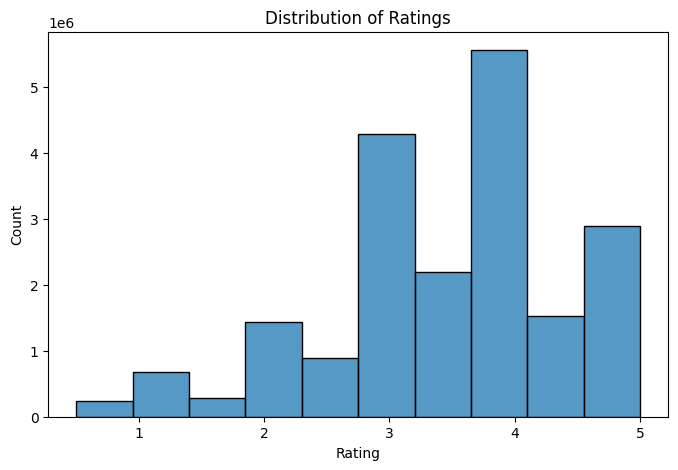

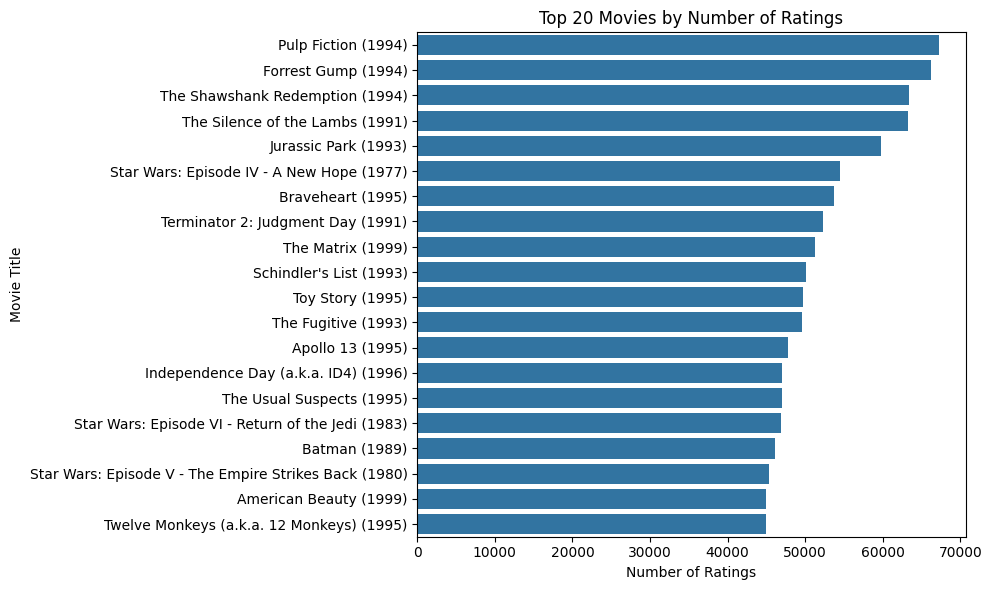


Number of movies per genre:
genres_list
Drama                 13344
Comedy                 8374
Thriller               4178
Romance                4127
Action                 3520
Crime                  2939
Horror                 2611
Documentary            2471
Adventure              2329
Sci-Fi                 1743
Mystery                1514
Fantasy                1412
War                    1194
Children               1139
Musical                1036
Animation              1027
Western                 676
Film-Noir               330
(no genres listed)      246
IMAX                    196
Name: count, dtype: int64


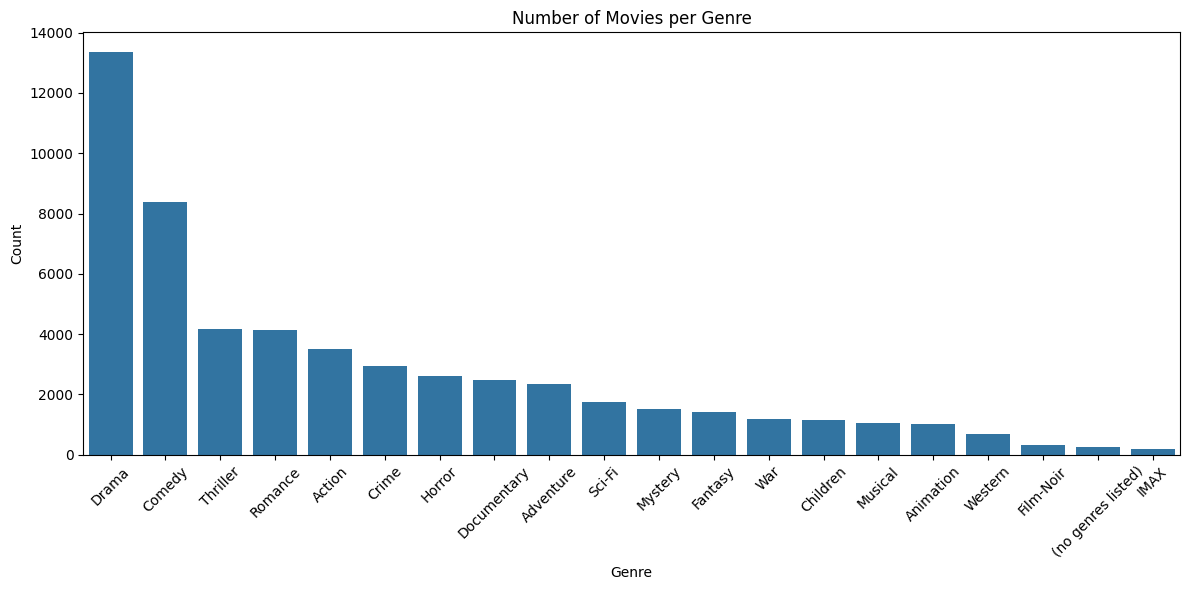


Average rating per genre:
genres_list
Film-Noir             3.965381
War                   3.809531
Documentary           3.739718
Crime                 3.674528
Drama                 3.674296
Mystery               3.663509
IMAX                  3.655946
Animation             3.617494
Western               3.570498
Musical               3.558091
Romance               3.541803
Thriller              3.507111
Fantasy               3.505945
Adventure             3.501893
Action                3.443864
Sci-Fi                3.436773
Comedy                3.426011
Children              3.408114
Horror                3.277224
(no genres listed)    3.006925
Name: rating, dtype: float64


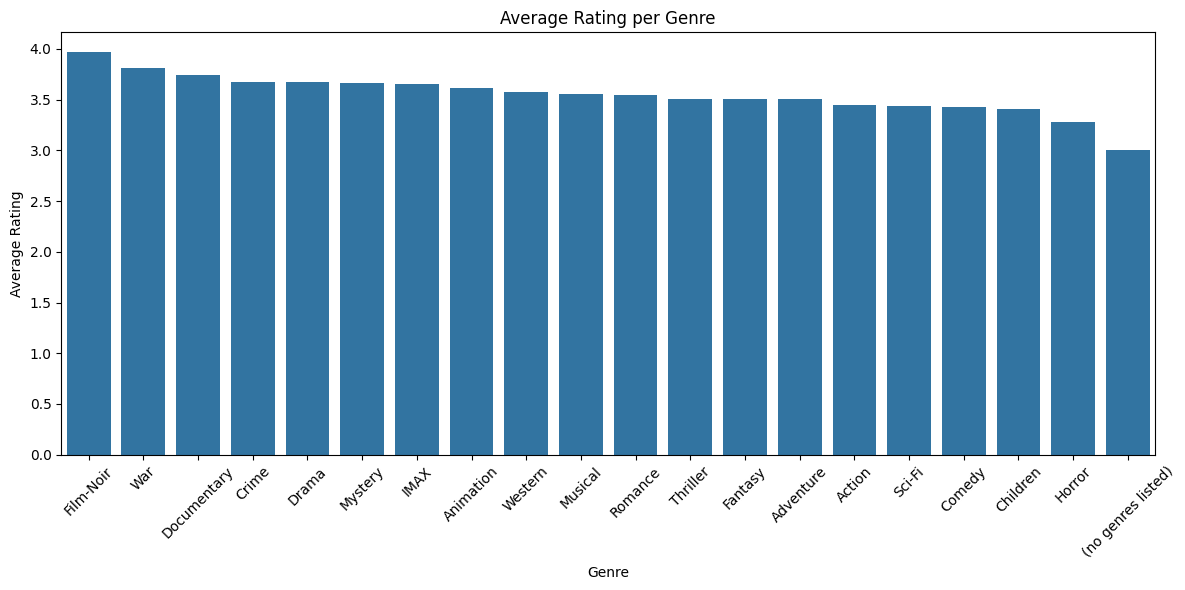

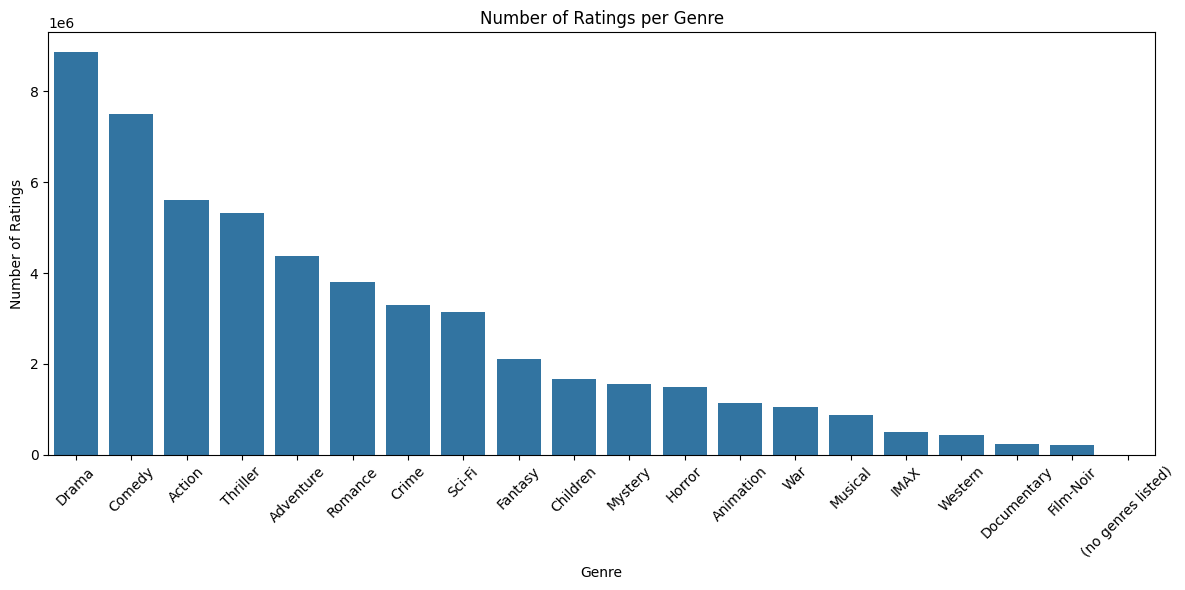

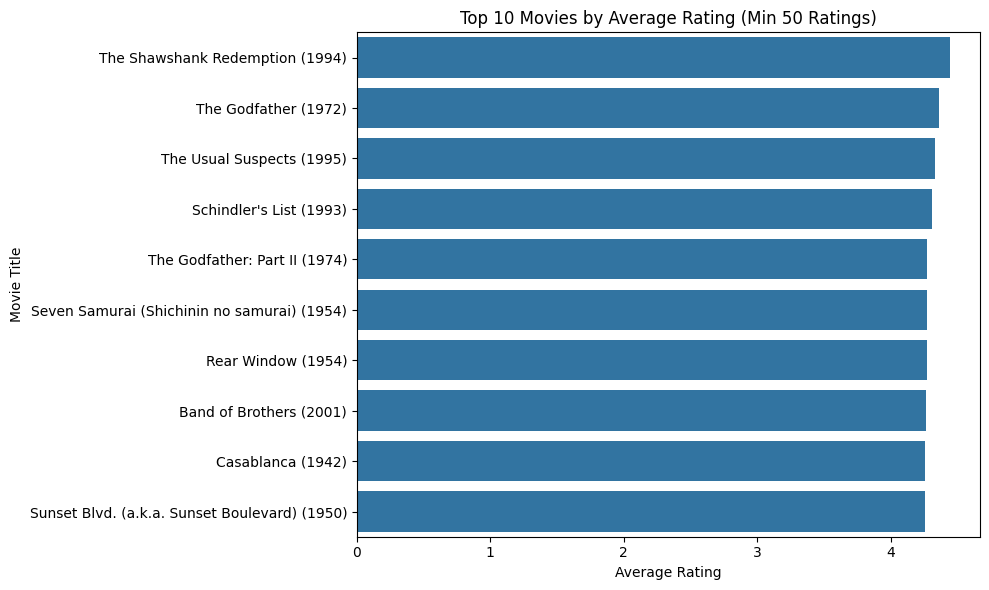

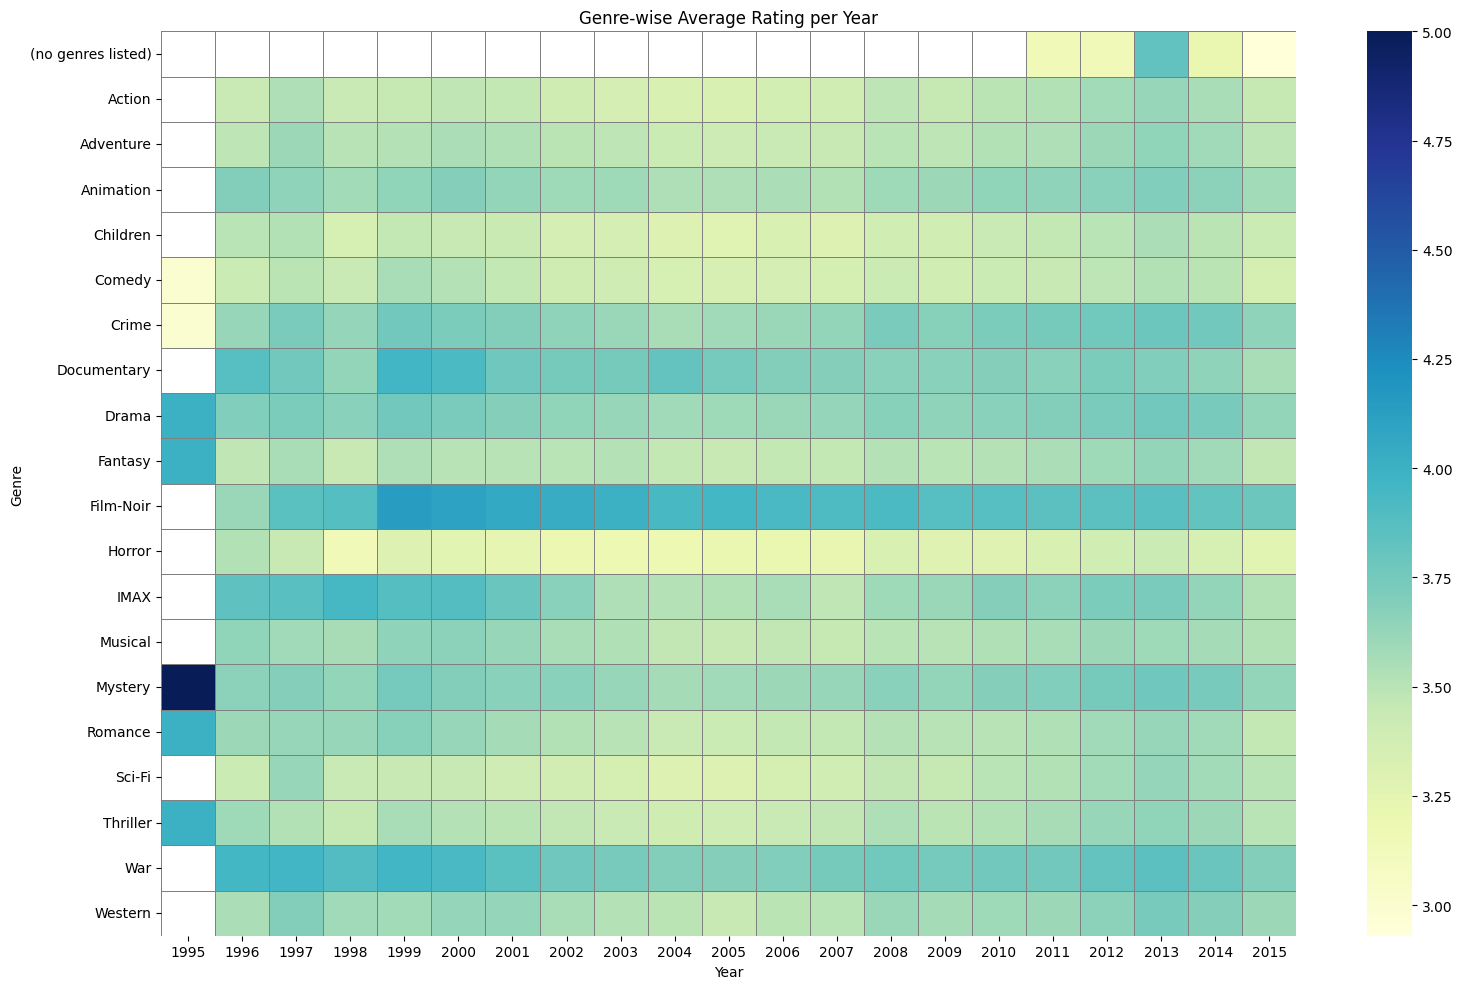

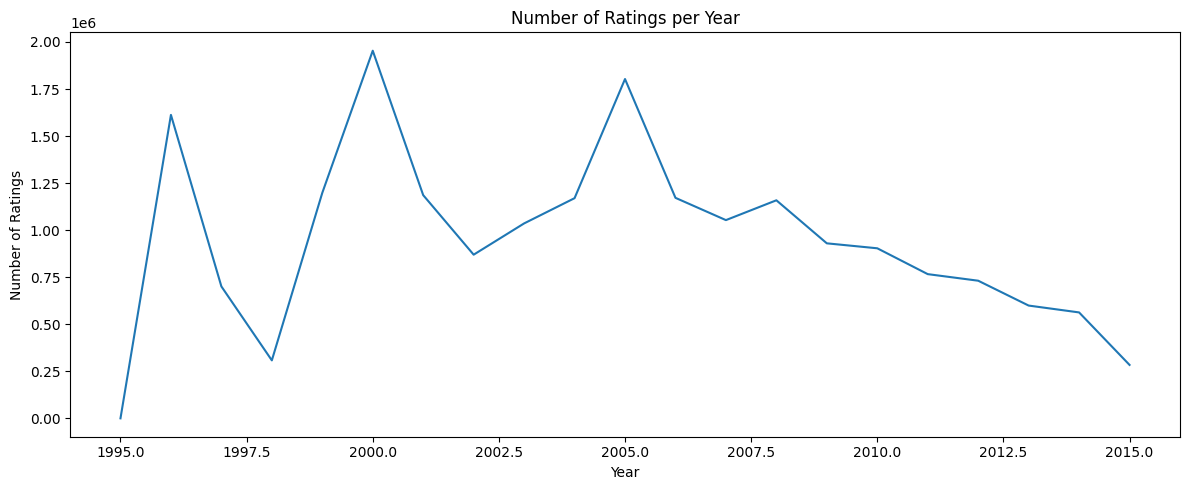

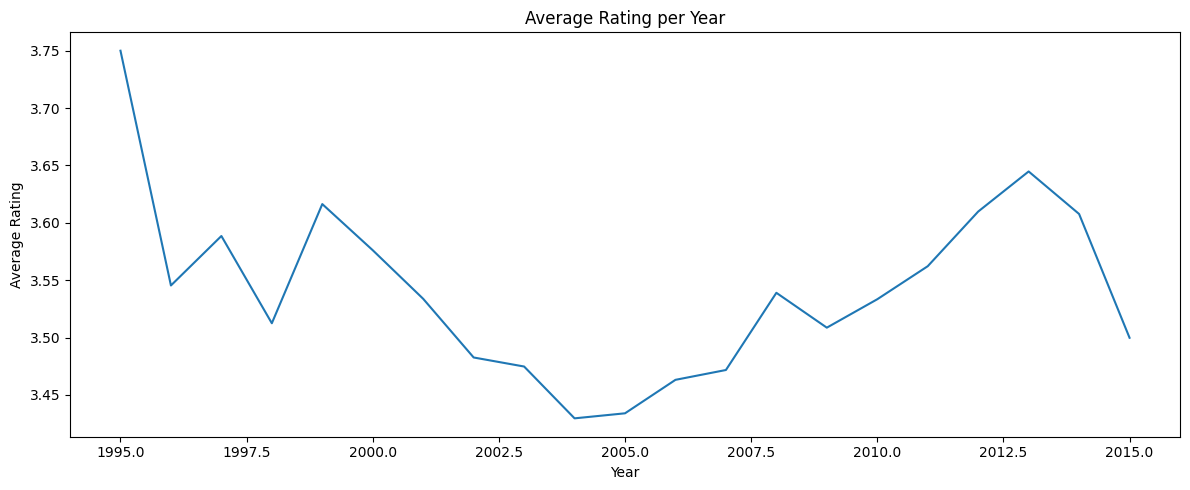

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

# Import custom data loaders
import sys
sys.path.append('../src')

from data_loader import (
    load_movie, load_rating, load_tag, 
    load_link, load_genome_scores, load_genome_tags
)

# --- Load Data ---
data_path = '../data'
movie = load_movie(data_path)
rating = load_rating(data_path)
tag = load_tag(data_path)
link = load_link(data_path)
genome_scores = load_genome_scores(data_path)
genome_tags = load_genome_tags(data_path)

# --- Clean Movie Titles ---
def restore_article(title):
    match = re.match(r'^(.*), (The|An|A) \((\d{4})\)$', title)
    if match:
        return f"{match.group(2)} {match.group(1)} ({match.group(3)})"
    return title

movie['title_clean'] = movie['title'].apply(restore_article)

# --- Quick Merge to Validate ---
rating_merged = rating.merge(movie[['movieId', 'title', 'title_clean']], on='movieId', how='left')
print(rating_merged[['movieId', 'title_clean', 'rating']].head())

# --- 1. Dataset Overview ---
print("Movies shape:", movie.shape)
print("Ratings shape:", rating.shape)
print("Tags shape:", tag.shape)
print("Links shape:", link.shape)
print("Genome Scores shape:", genome_scores.shape)
print("Genome Tags shape:", genome_tags.shape)

print("\nMovies sample:")
display(movie[['movieId', 'title', 'title_clean', 'genres']].head())

print("\nRatings sample:")
display(rating.head())

# --- 2. Missing Values Check ---
print("\nMissing values per dataset:")
datasets = {
    "Movies": movie, "Ratings": rating, "Tags": tag,
    "Links": link, "Genome Scores": genome_scores, "Genome Tags": genome_tags
}
for name, df in datasets.items():
    print(f"{name}:\n{df.isnull().sum()}\n")

# --- 3. Basic Statistics ---
print("\nRatings statistics:")
display(rating['rating'].describe())

print("\nNumber of unique users:", rating['userId'].nunique())
print("Number of unique movies rated:", rating['movieId'].nunique())

print("\nMovie genres sample:")
print(movie['genres'].head())

# --- 4. Visualizations ---

# 4.1 Rating Distribution
plt.figure(figsize=(8, 5))
sns.histplot(rating['rating'], bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# 4.2 Top 20 Most Rated Movies by Title
ratings_with_titles = rating.merge(movie[['movieId', 'title_clean']], on='movieId', how='left')
top_titles = ratings_with_titles['title_clean'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_titles.index, x=top_titles.values)
plt.title('Top 20 Movies by Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()

# 4.3 Genre Analysis
movie['genres_list'] = movie['genres'].apply(lambda x: x.split('|') if isinstance(x, str) else [])
movies_exploded = movie.explode('genres_list')

# Movies per Genre
genre_counts = movies_exploded['genres_list'].value_counts()
print("\nNumber of movies per genre:")
print(genre_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ratings per Genre
ratings_with_genres = rating.merge(movies_exploded[['movieId', 'genres_list']], on='movieId', how='left')
avg_rating_per_genre = ratings_with_genres.groupby('genres_list')['rating'].mean().sort_values(ascending=False)

print("\nAverage rating per genre:")
print(avg_rating_per_genre)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_per_genre.index, y=avg_rating_per_genre.values)
plt.title('Average Rating per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Number of Ratings per Genre
ratings_count_per_genre = ratings_with_genres.groupby('genres_list')['rating'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=ratings_count_per_genre.index, y=ratings_count_per_genre.values)
plt.title('Number of Ratings per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 5. Movie Rating Quality ---
movie_stats = ratings_with_titles.groupby('title_clean').agg({'rating': ['mean', 'count']})
movie_stats.columns = ['avg_rating', 'rating_count']

# Filter to movies with at least 50 ratings
popular_movies = movie_stats[movie_stats['rating_count'] >= 50].sort_values('avg_rating', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=popular_movies.index, x=popular_movies['avg_rating'])
plt.title('Top 10 Movies by Average Rating (Min 50 Ratings)')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()

# Add 'year' to ratings_with_genres
ratings_with_genres['timestamp'] = pd.to_datetime(ratings_with_genres['timestamp'])
rating['timestamp'] = pd.to_datetime(rating['timestamp'])

if not pd.api.types.is_datetime64_any_dtype(ratings_with_genres['timestamp']):
    ratings_with_genres['timestamp'] = pd.to_datetime(ratings_with_genres['timestamp'])

if not pd.api.types.is_datetime64_any_dtype(rating['timestamp']):
    rating['timestamp'] = pd.to_datetime(rating['timestamp'])

ratings_with_genres['year'] = ratings_with_genres['timestamp'].dt.year
# Group by genre and year to calculate average rating
genre_year_avg = ratings_with_genres.groupby(['genres_list', 'year'])['rating'].mean().unstack()

plt.figure(figsize=(16, 10))
sns.heatmap(genre_year_avg, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('Genre-wise Average Rating per Year')
plt.xlabel('Year')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# Count number of ratings per year
ratings_per_year = rating.copy()
ratings_per_year['timestamp'] = pd.to_datetime(ratings_per_year['timestamp'], unit='s')
ratings_per_year['year'] = ratings_per_year['timestamp'].dt.year

ratings_count_year = ratings_per_year.groupby('year')['rating'].count()

plt.figure(figsize=(12, 5))
sns.lineplot(x=ratings_count_year.index, y=ratings_count_year.values)
plt.title('Number of Ratings per Year')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.tight_layout()
plt.show()

# Average rating per year
avg_rating_year = ratings_per_year.groupby('year')['rating'].mean()

plt.figure(figsize=(12, 5))
sns.lineplot(x=avg_rating_year.index, y=avg_rating_year.values)
plt.title('Average Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()
